In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from fradm.tn_test import *
import matplotlib.pyplot as plt
from ncon import ncon

In [32]:
L = 7
chi = 8
chain = Z2_chain_massive_mps(L=L, d=2, chi=chi, J=1, h1=0.1, h2=0.1)
chain._random_state(seed=3, chi=chi)
chain.canonical_form()
chain.DMRG(trunc_tol=False, trunc_chi=True)
# chain.DMRG(trunc_tol=True, trunc_chi=False)
tensor_shapes(chain.sites)
Z = np.array([[1,0],[0,-1]])
Z = np.array([[1,0],[0,-1]])
exp_vals = []
for i in range(L):
    chain.local_order_param(site=i)
    occup = chain.mpo_first_moment().real
    exp_vals.append(occup)

Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-10 after:
1 sweeps at site 2
total iterations 13
total time: 0.09693020599661395
##############################
(1, 2, 2)
(2, 2, 4)
(4, 2, 8)
(8, 2, 8)
(8, 2, 4)
(4, 2, 2)
(2, 2, 1)


In [51]:
occup_state = np.array([0,1]).reshape((1,2,1))
vacuum_state = np.array([1,0]).reshape((1,2,1))
vacuum_tensor = [vacuum_state for _ in range(L)]
vacuum_tensor[L//2] = occup_state
vacuum_tensor[L//2-1] = occup_state
vacuum_tensor[L//2+1] = occup_state
perturbed_tensor = vacuum_tensor

In [59]:
chi = 8
chain = Z2_chain_massive_mps(L=L, d=2, chi=chi, J=1, h1=0.1, h2=0.1)
chain.sites = perturbed_tensor
chain.enlarge_chi();

In [60]:
params_quench = dict(trotter_steps = 100,
        delta = 0.1,
        n_sweeps = 8,
        conv_tol = 1e-10,
        bond = True,
        where = -1)
errs, entrs, smvs = chain.TEBD_Z2_chain(params_quench=params_quench)

------ Trotter steps: 0 -------
Bond dim ancilla: 8
Bond dim site: 8
Sweep n: 0

Sweep n: 1

##############################
The error between the two last updated states converged
to an order of 1e-10 after:
1 sweeps at site 6
total iterations 13
##############################
------ Trotter steps: 1 -------
Bond dim ancilla: 8
Bond dim site: 8
Sweep n: 0

Sweep n: 1

##############################
The error between the two last updated states converged
to an order of 1e-10 after:
1 sweeps at site 6
total iterations 13
##############################
------ Trotter steps: 2 -------
Bond dim ancilla: 8
Bond dim site: 8
Sweep n: 0

Sweep n: 1

##############################
The error between the two last updated states converged
to an order of 1e-10 after:
1 sweeps at site 6
total iterations 13
##############################
------ Trotter steps: 3 -------
Bond dim ancilla: 8
Bond dim site: 8
Sweep n: 0

Sweep n: 1

##############################
The error between the two last updated sta

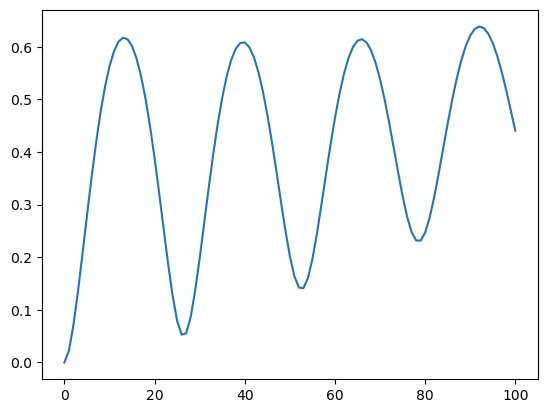

In [61]:
plt.plot(entrs)

------ Trotter steps: 0 -------
Bond dim ancilla: 8
Bond dim site: 8
Sweep n: 0

Sweep n: 1

##############################
The error between the two last updated states converged
to an order of 1e-10 after:
1 sweeps at site 24
total iterations 49
##############################
------ Trotter steps: 1 -------
Bond dim ancilla: 8
Bond dim site: 5
Sweep n: 0

Sweep n: 1

##############################
The error between the two last updated states converged
to an order of 1e-10 after:
1 sweeps at site 24
total iterations 49
##############################
------ Trotter steps: 2 -------
Bond dim ancilla: 5
Bond dim site: 5
Sweep n: 0

Sweep n: 1

##############################
The error between the two last updated states converged
to an order of 1e-10 after:
1 sweeps at site 24
total iterations 49
##############################
------ Trotter steps: 3 -------
Bond dim ancilla: 5
Bond dim site: 5
Sweep n: 0

Sweep n: 1

##############################
The error between the two last updated 

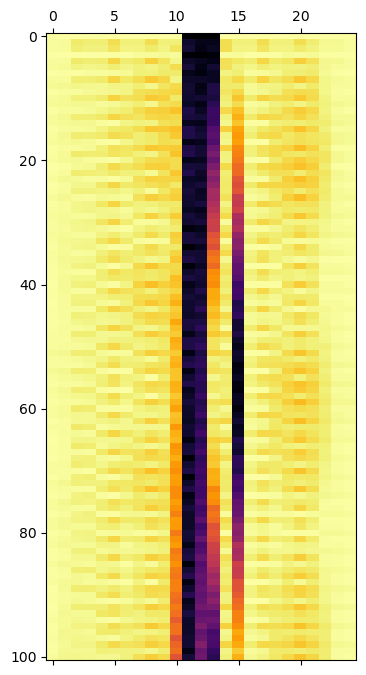

In [76]:
chis = [8]
L = 25
occup_state = np.array([0,1]).reshape((1,2,1))
vacuum_state = np.array([1,0]).reshape((1,2,1))
vacuum_tensor = [vacuum_state for _ in range(L)]
vacuum_tensor[L//2] = occup_state
vacuum_tensor[L//2-1] = occup_state
vacuum_tensor[L//2+1] = occup_state
perturbed_tensor = vacuum_tensor
for chi in chis:
        chain = Z2_chain_massive_mps(L=L, d=2, chi=chi, J=1, h1=0.1, h2=0.1)
        chain.sites = perturbed_tensor
        chain.enlarge_chi()
        params_quench = dict(trotter_steps = 100,
                delta = 1,
                n_sweeps = 8,
                conv_tol = 1e-10,
                bond = True,
                where = -1)
        errs, entrs, smvs, evs = chain.TEBD_Z2_chain(params_quench=params_quench)
        # plt.plot(entrs, label=f"chi: {chi}")
        plt.matshow(evs, cmap='inferno', aspect=0.5)
        plt.show()

# plt.title("Entanglement Entropy for $L=$"+f"${L}$")
# plt.xlabel("Trotter step $(T)$")
# plt.ylabel("Entanglement Entropy $(S_{vn})$")
# plt.legend()

## Construct MPO

We define three mpos for the mass and gauge sites, we have to use them to find a single mpo for the bulk of the chain and the boundaries

In [ ]:
theta = np.pi/3
I = identity(2).toarray()
O = np.zeros((2,2))
X = sparse_pauli_x(0,1).toarray()
w_start = np.asarray([(np.cos(theta))**(1/3)*I, (np.sin(theta))**(1/3)*X]).reshape((1,2,2,2))
w_middle = np.asarray([[(np.cos(theta))**(1/3)*I, O],[O, (np.sin(theta))**(1/3)*X]])
w_end = np.asarray([(np.cos(theta))**(1/3)*I, -1j*(np.sin(theta))**(1/3)*X]).reshape((2,1,2,2))
print(np.cos(theta)**(1/3)*np.sin(theta)**(1/3),np.cos(theta)**(2/3),np.sin(theta)**(2/3))

In [ ]:
w_1_l = w_start
w_2_l = ncon([w_start,w_middle],[[-1,-3,-5,1],[-2,-4,1,-6]]).reshape((2,4,2,2))
w_1_r = w_end
w_2_r = ncon([w_end,w_middle],[[-1,-3,-5,1],[-2,-4,1,-6]]).reshape((4,2,2,2))
print(w_1_l,w_2_l,w_1_r,w_2_r)

In [ ]:
w_b_1 = ncon([w_start,w_middle,w_end],[[-1,-4,-7,1],[-2,-5,1,2],[-3,-6,2,-8]]).reshape((4,4,2,2))
w_b_2 = ncon([w_middle,w_end,w_start],[[-1,-4,-7,1],[-2,-5,1,2],[-3,-6,2,-8]]).reshape((4,4,2,2))
w_b_3 = ncon([w_end,w_start,w_middle],[[-1,-4,-7,1],[-2,-5,1,2],[-3,-6,2,-8]]).reshape((4,4,2,2))
edge_l_mpo = [w_1_l,w_2_l]
bulk_mpo = [w_b_3,w_b_2,w_b_1]
edge_r_mpo = [w_2_r,w_1_r]

We can visualize it with `sympy`

In [ ]:
from sympy import *
theta, I, O, X, i = symbols('θ I O X i')

In [ ]:
w_l1 = Matrix([[(cos(theta))**(S(1)/3)* I, (sin(theta))**(S(1)/3)*X]])
w_l2 = Matrix([[(cos(theta))**(S(2)/3)* I, O, (sin(theta)*cos(theta))**(S(1)/3)*X, O],[O, (sin(theta)*cos(theta))**(S(1)/3)*X, O, (sin(theta))**(S(2)/3)*I]])
w_r1 = Matrix([[(cos(theta))**(S(1)/3)* I],[-i*(sin(theta))**(S(1)/3)*X]])
w_r2 = Matrix([[(cos(theta))**(S(2)/3)* I, O],
                [-i*(sin(theta)*cos(theta))**(S(1)/3)*X, O],
                [O, (sin(theta)*cos(theta))**(S(1)/3)*X],
                [O, -(sin(theta))**(S(2)/3)*I]])

In [ ]:
display(w_l1,w_l2,w_r1,w_r2)